In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [105]:
# Load the CSV file
data = pd.read_csv('F:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [106]:
data.dropna(inplace=True)  # Drop rows with missing values

In [107]:
# Split the dataset into features (X) and labels (y)
X = data.drop('AHD', axis=1)
y = data['AHD']

In [108]:
# Encode categorical variables
categorical_cols = [ 'Thal', 'ChestPain']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [109]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Initialize the classifier
classifier = RandomForestClassifier()

In [111]:
# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.89      0.88        36
         Yes       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



In [113]:
cm = confusion_matrix(y_test, y_pred)

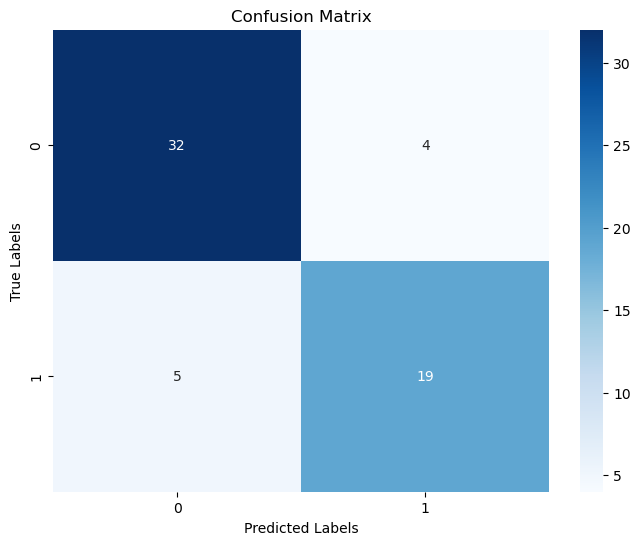

In [114]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [115]:
y_prob = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)

In [116]:
y_test = y_test.map({'No': 0, 'Yes': 1})

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])

In [118]:
sorted_indices = np.argsort(y_prob[:, 1])[::-1]
num_instances = len(y_test)
cumulative_positives = np.cumsum(y_test.iloc[sorted_indices] == 1) / sum(y_test == 1)
percent_positives = cumulative_positives / np.linspace(0.01, 1, num_instances)

In [119]:
random_positives = np.linspace(0.01, 1, num_instances)

In [120]:
gain = percent_positives
lift = gain / random_positives

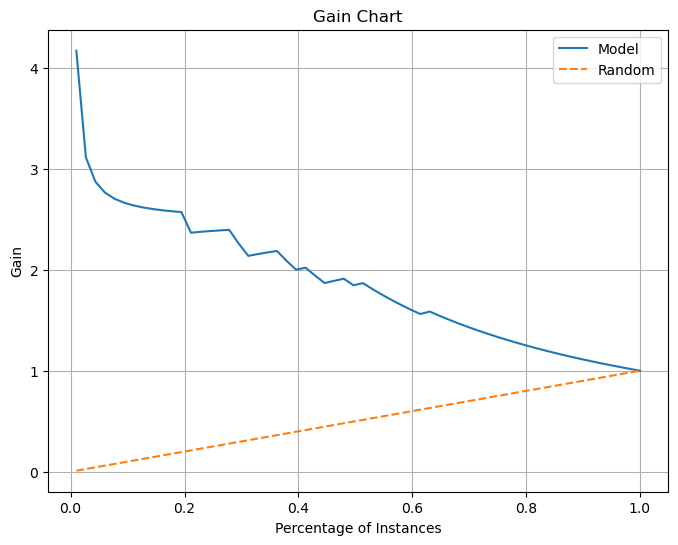

In [121]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.01, 1, num_instances), gain, label='Model')
plt.plot(np.linspace(0.01, 1, num_instances), random_positives, linestyle='--', label='Random')
plt.xlabel('Percentage of Instances')
plt.ylabel('Gain')
plt.title('Gain Chart')
plt.legend()
plt.grid(True)
plt.show()

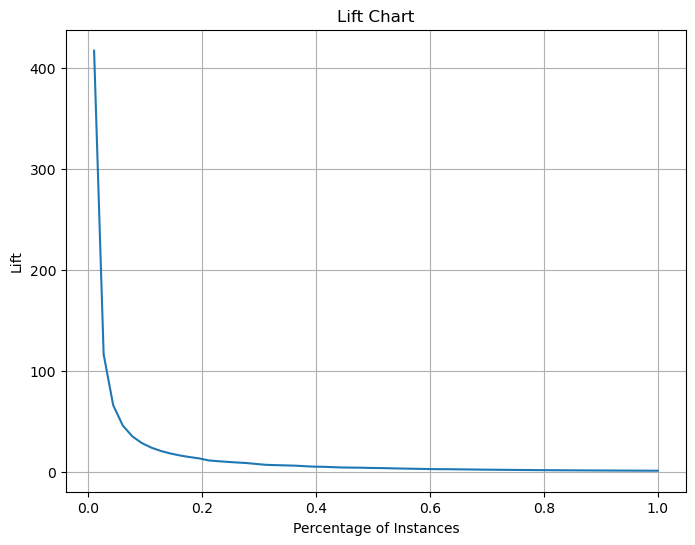

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.01, 1, num_instances), lift)
plt.xlabel('Percentage of Instances')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.grid(True)
plt.show()

In [123]:
scores = cross_val_score(classifier, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

In [124]:
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.85       0.86666667 0.76271186 0.76271186 0.79661017]
Mean accuracy: 0.8077401129943501
Standard deviation: 0.043444674613883016
